In [190]:
import csv
import math
import matplotlib.pyplot as plt
import seaborn as sns

In [194]:
def remove_chars(str):
    removeChars = " '\"\\[]"
    return ''.join(ch for ch in str if ch not in removeChars)

In [240]:
tags = {}
tagNum = 0

In [242]:
with open('RAW_recipes.csv', mode='r', encoding='utf-8') as file:
    reader = csv.DictReader(file)
    for row in reader:
        for tag in row['tags'].split(','):
            rtag = remove_chars(tag)
            if rtag not in tags:
                tags[rtag] = [tagNum, 1]
                tagNum += 1
            else:
                tags[rtag][1] += 1

In [250]:
def tag_to_vec(recipeTags):
    tagVec = [0 for _ in range(len(tags))]
    rTags = recipeTags.split(',')
    for rt in rTags:
        rt = remove_chars(rt)
        if rt in tags:
            tagVec[tags[rt][0]] = 1
    return tagVec

In [252]:
with open('RAW_recipes.csv', mode='r', encoding='utf-8') as fr, \
    open('RAW_recipes_convert_tags.csv', mode='w', encoding='utf-8', newline='') as fw:
        reader = csv.DictReader(fr)
        writer = csv.DictWriter(fw, fieldnames=reader.fieldnames)
        writer.writeheader()
        for row in reader:
            if 'tags' in row:
                row['tags'] = tag_to_vec(row['tags'])
            writer.writerow(row)

In [358]:
tagStat = []
for t in tags:
    tagStat.append(tags[t])
tagStat.sort(key=lambda x:x[1], reverse=True)

In [290]:
values = [math.log2(x[1]) for x in tagStat]

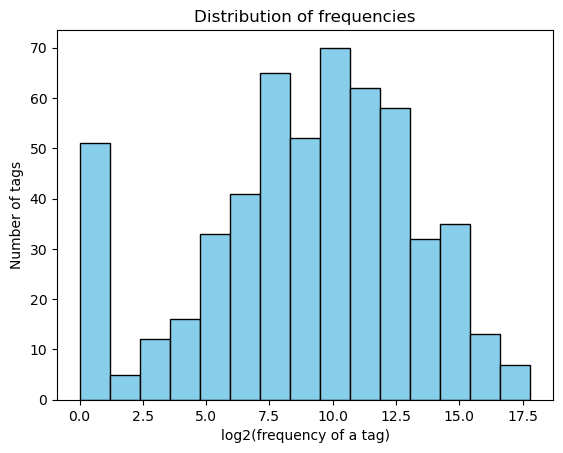

In [392]:
plt.hist(values, bins=15, color='skyblue', edgecolor='black')
plt.title('Distribution of frequencies')
plt.xlabel('log2(frequency of a tag)')
plt.ylabel('Number of tags')
plt.show()

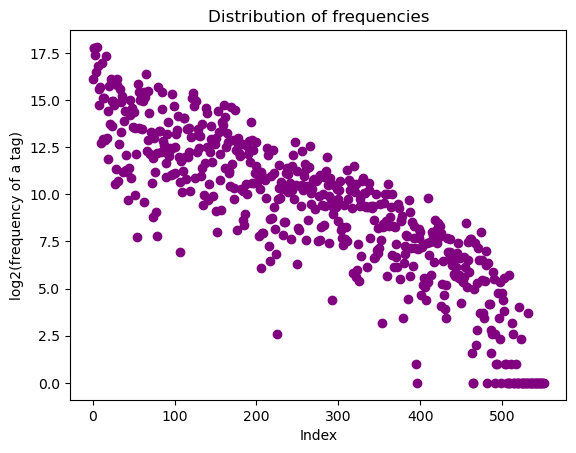

In [394]:
indices = [x[0] for x in tagStat]
plt.scatter(indices, values, color='purple')
plt.title('Distribution of frequencies')
plt.xlabel('Index')
plt.ylabel('log2(frequency of a tag)')
plt.show()

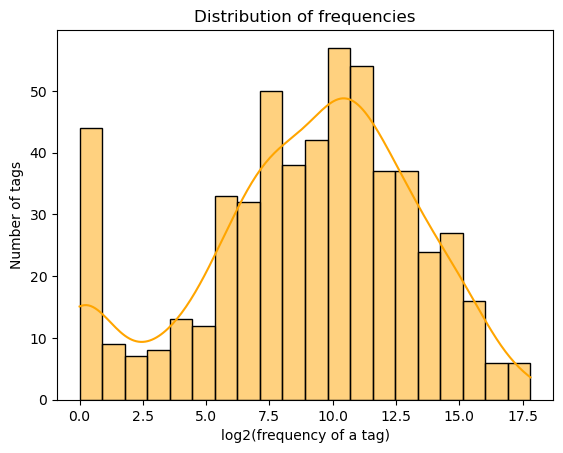

In [396]:
sns.histplot(values, bins=20, kde=True, color='orange')
plt.title('Distribution of frequencies')
plt.xlabel('log2(frequency of a tag)')
plt.ylabel('Number of tags')
plt.show()

In [354]:
tagStat2 = []
for t in tags:
    tagStat2.append([t, tags[t][0], tags[t][1]])
tagStat2.sort(key=lambda x:x[2], reverse=True)

In [364]:
# remove tags occuring below 5 times 
tagsCut = {}
newIdx = 0
for t in tags:
    if tags[t][1] >= 5:
        tagsCut[t] = [newIdx, tags[t][1]]
        newIdx += 1

In [380]:
def tag_to_vec2(recipeTags):
    tagVec = [0 for _ in range(len(tagsCut))]
    rTags = recipeTags.split(',')
    for rt in rTags:
        rt = remove_chars(rt)
        if rt in tagsCut:
            tagVec[tagsCut[rt][0]] = 1
    return tagVec

In [382]:
with open('RAW_recipes.csv', mode='r', encoding='utf-8') as fr, \
    open('RAW_recipes_convert_tags_remove_below5.csv', mode='w', encoding='utf-8', newline='') as fw:
        reader = csv.DictReader(fr)
        writer = csv.DictWriter(fw, fieldnames=reader.fieldnames)
        writer.writeheader()
        for row in reader:
            if 'tags' in row:
                row['tags'] = tag_to_vec2(row['tags'])
            writer.writerow(row)